**Problem 1**

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np

#loading dataset
dataset = load_breast_cancer()
x_data = dataset['data']

def k_means(data, k):
    #assign the initial centroids to a random datapoint
    random_indices = np.random.choice(data.shape[0], k, replace=False)  # shape[0] gives the number of rows
    centroids = data[random_indices]

    max_iter = 500

    for iter in range(max_iter):
        # empty array to store cluster assignments for each point
        cluster_assignment = np.zeros(data.shape[0])

        # loop through each data point
        for i in range(data.shape[0]):
            # calculate distances between the datapoint and all centroids
            distances = np.sqrt(np.sum(np.power(centroids - data[i], 2), axis=1))
            # assign the datapoint to the cluster with the closest centroid
            cluster_assignment[i] = np.argmin(distances)

        # making sure cluster_assignment only contains ints not floats
        cluster_assignment = cluster_assignment.astype(int)

        # update location of centroids based on the mean of the points in each cluster
        new_centroids = []
        for j in range(k): # loops through each cluster index
          mask = (cluster_assignment==j)
          clusterj_data = data[mask]
          clusterj_mean = clusterj_data.mean(axis=0)
          new_centroids.append(clusterj_mean)

        # break if converged
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_assignment


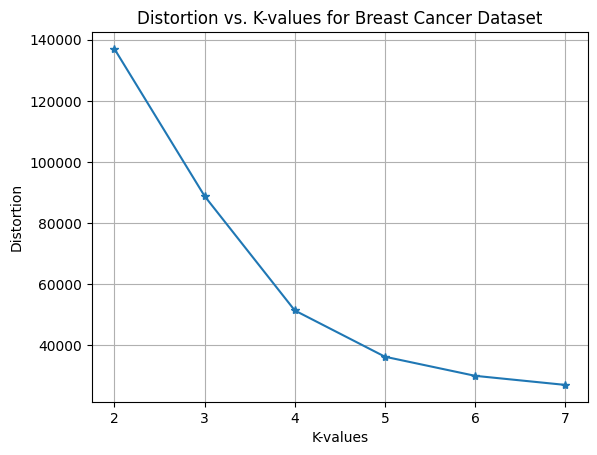

In [ ]:
import matplotlib.pyplot as plt

#function below calculates the distortion
def get_distortion(data, centroids, cluster_assignment):
  distortion = 0
  for i in range(data.shape[0]):
    centroid = centroids[cluster_assignment[i]]
    distortion += (1/data.shape[0])*np.sum(np.power(data[i] - centroid, 2))
  return distortion

k_range = range(2,8)
distortions = []

#loop through k values and append distortion values to list (to be plotted in the figure)
for k in k_range:
  centroids, cluster_assignment = k_means(x_data, k) #this k_means function is what was submitted in question 1
  distortions.append(get_distortion(x_data, centroids, cluster_assignment))

#plotting figure
plt.plot(k_range, distortions, marker='*')
plt.xlabel('K-values')
plt.ylabel('Distortion')
plt.title('Distortion vs. K-values for Breast Cancer Dataset')
plt.grid(True)
plt.show()

